In [2]:
import os
import os.path as osp
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import plumed 



+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


rmsd, center=0.8, range= (-19.20210434432, 20.79789565568) 

eulerTheta, center=6.67, range= (-13.325038390742797, 26.674961609257203) 

eulerPhi, center=-16.21, range= (-36.21033912910666, 3.7896608708933393) 

eulerPsi, center=15.95, range= (-4.049026428233164, 35.95097357176684) 

polarTheta, center=67.22, range= (47.218820871914346, 87.21882087191435) 

polarPhi, center=58.17, range= (38.17058528809099, 78.17058528809099) 

r, center=6.37, range= (-13.627778070037273, 26.372221929962727) 

translation, center=0.13, range= (-19.87479574029407, 20.12520425970593) 



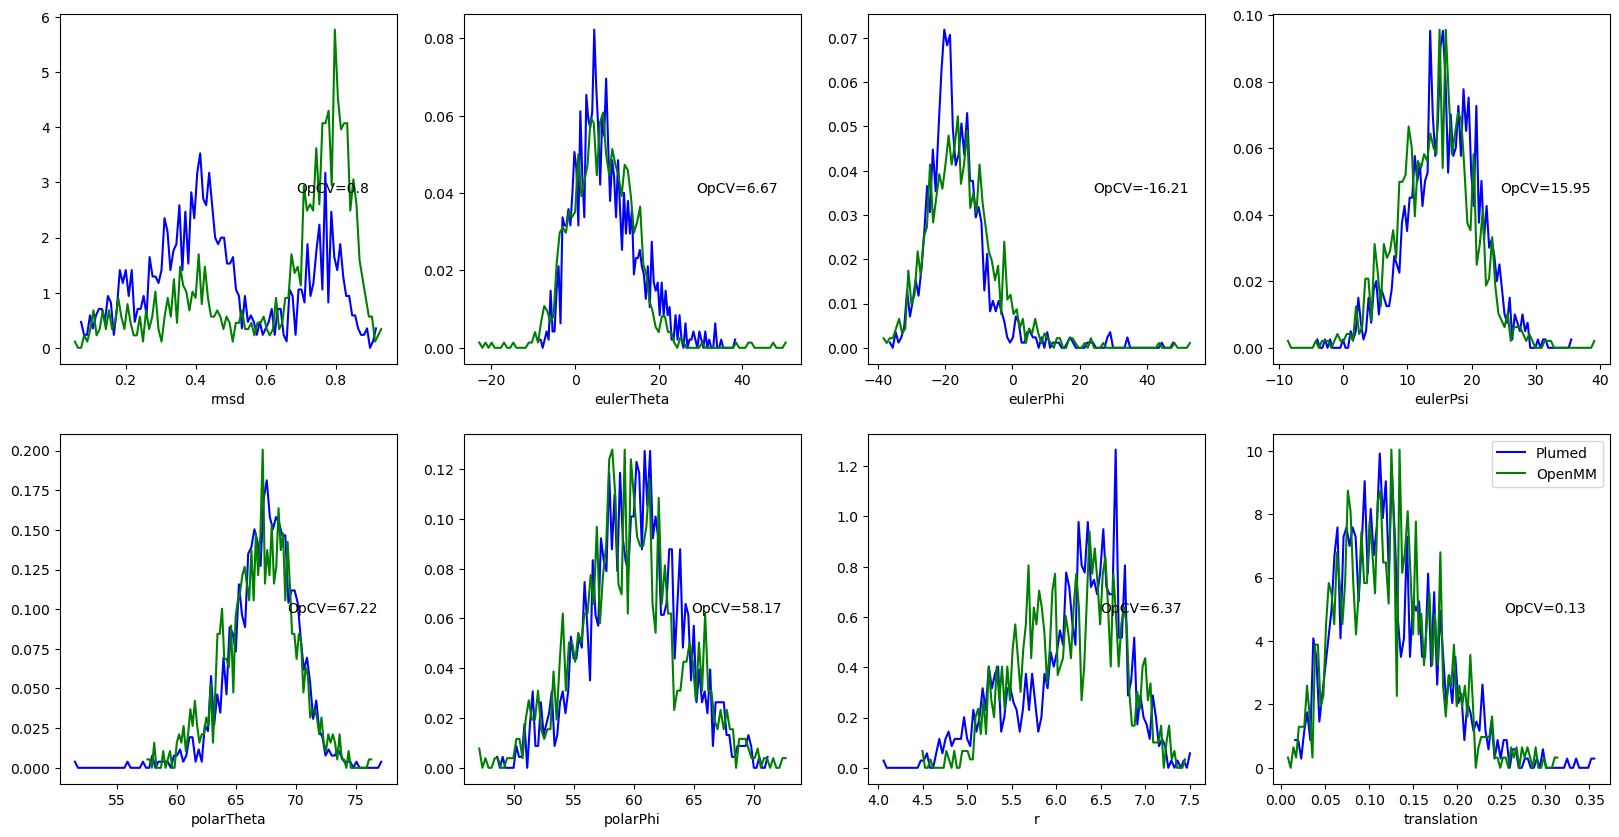

In [3]:

plumed_CVs = plumed.read_as_pandas('../../openmm_plumed/000_eq/COLVAR')
openmm_CVs = pd.read_csv('../000_eq/COLVAR')
plumed_CVs['rmsd'] *= 10
plumed_CVs['translation'] *= 10
plumed_CVs['r'] *= 10
CV_names = ['rmsd', 'eulerTheta', 'eulerPhi', 'eulerPsi', 'polarTheta', 'polarPhi', 'r', 'translation'] 


openmm_CVs['rmsd'] *= 10
openmm_CVs['translation'] *= 10
openmm_CVs['r'] *= 10

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20, 10)
axes = axes.flatten()
for idx, cv_name in enumerate(CV_names):
    bins, edges = np.histogram(plumed_CVs[cv_name], bins=100, density=True)
    axes[idx].plot(edges[:-1], bins, 'b', label="Plumed")
  
    bins, edges = np.histogram(openmm_CVs[cv_name], bins=100, density=True)
    axes[idx].plot(edges[:-1], bins, 'g', label="OpenMM")
    center = round(edges[np.argmax([bins])], 2)
    print(f'{cv_name}, center={center}, range= {edges[np.argmax([bins])] -20.00, edges[np.argmax([bins])] + 20.00} \n')
    axes[idx].text(0.81, 0.5, f'OpCV={center}', horizontalalignment='center', 
                   verticalalignment='center', transform=axes[idx].transAxes)
    axes[idx].set_xlabel(cv_name)
plt.legend(loc="best")    
plt.savefig('../analysis/figures/OpenMM_Plumed_eq_cvs_hist.png')

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++
/tmp/ipykernel_45664/3243974353.py:22: RuntimeWarning: divide by zero encountered in log
  free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
/tmp/ipykernel_45664/3243974353.py:27: RuntimeWarning: divide by zero encountered in log
  free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184


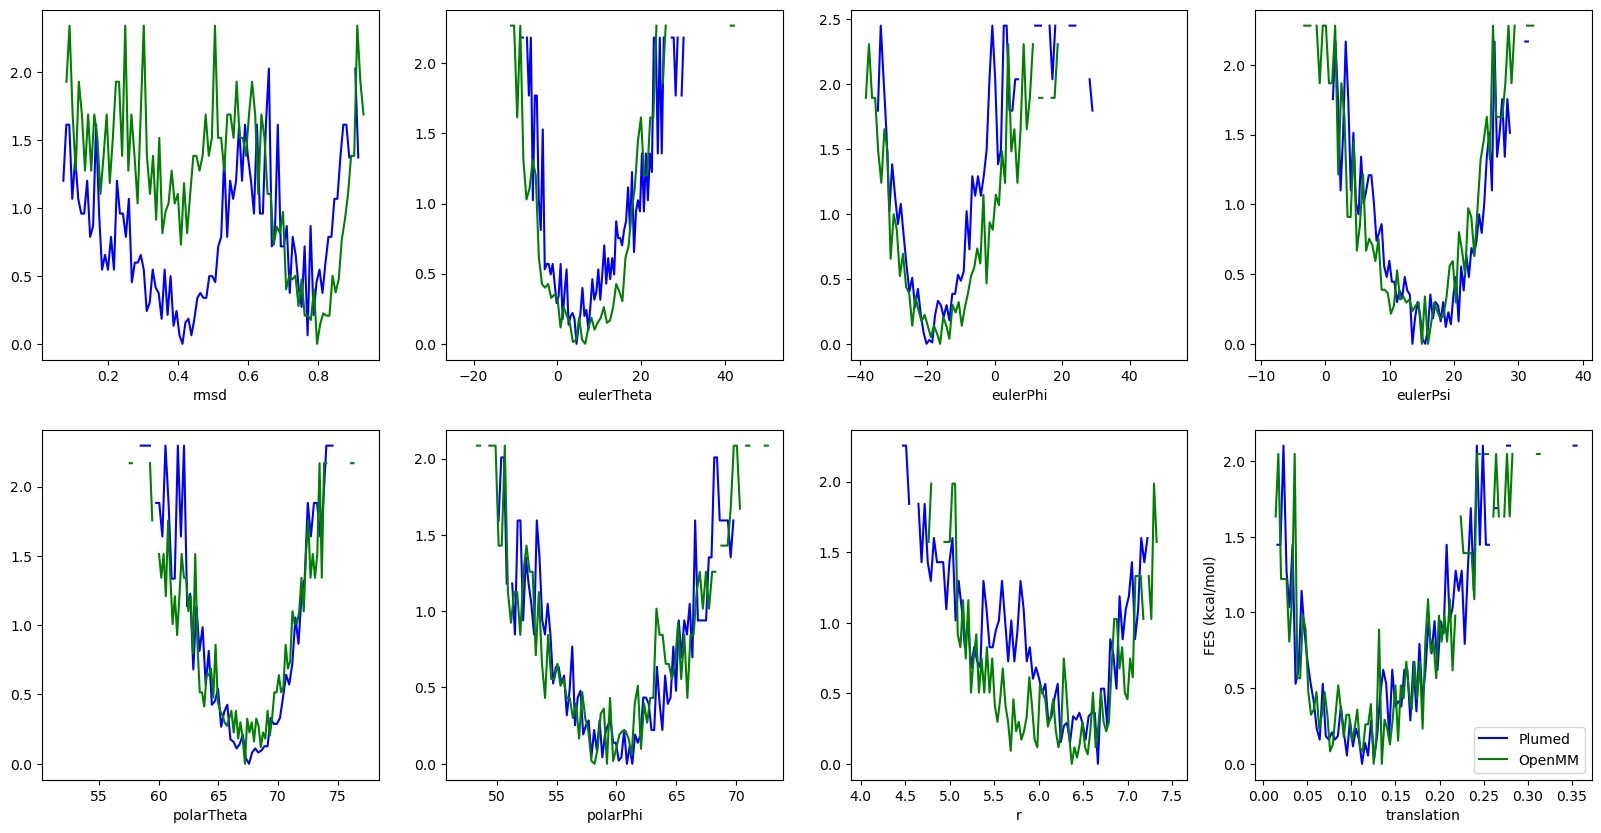

In [4]:
# dG = -RT ln P, R is the gas constant 
TEMPERATURE = 300 #* unit.kelvin
GAS_CONSTANT = 8.314e-3  #kJ/(mol·K)

plumed_CVs = plumed.read_as_pandas('../../openmm_plumed/000_eq/COLVAR')
openmm_CVs = pd.read_csv('../000_eq/COLVAR')
plumed_CVs['rmsd'] *= 10
plumed_CVs['translation'] *= 10
plumed_CVs['r'] *= 10
CV_names = ['rmsd', 'eulerTheta', 'eulerPhi', 'eulerPsi', 'polarTheta', 'polarPhi', 'r', 'translation'] 


openmm_CVs['rmsd'] *= 10
openmm_CVs['translation'] *= 10
openmm_CVs['r'] *= 10

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20, 10)
axes = axes.flatten()
for idx, cv_name in enumerate(CV_names):
    bins, edges = np.histogram(plumed_CVs[cv_name], bins=100, density=True)
    free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
    min_fes = min(free_energy_op_unbiased)
    axes[idx].plot(edges[:-1], free_energy_op_unbiased - min_fes, 'b', label="Plumed")
    
    bins, edges = np.histogram(openmm_CVs[cv_name], bins=100, density=True)
    free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
    min_fes = min(free_energy_op_unbiased)
    axes[idx].plot(edges[:-1], free_energy_op_unbiased - min_fes, 'g', label="OpenMM")
    axes[idx].set_xlabel(cv_name)

plt.ylabel("FES (kcal/mol)")
plt.legend()
plt.savefig('../analysis/figures/OpenMM_Plumed_eq_cvs_fes.png')